In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../../")
sys.path.append('.')

import numpy
import pylab
from ctm.ctmLink import CTMLink
from ctm.variableLaneFDLink import VariableLaneFDLink
from ctm.triangularFundamentalDiagram import TriangularFundamentalDiagram
import ctm.capacityDropMerge
from continuousSingleCommodity.originNode import OriginNode
from continuousSingleCommodity.destinationNode import DestinationNode
from continuousSingleCommodity.mergeNode import MergeNode
from continuousSingleCommodity.oneToOneNode import OneToOneNode
from continuousSingleCommodity.divergeNode import DivergeNode

import simulationengine.simulationRunner as simulationRunner
import optimizer

In [2]:
import matplotlib

matplotlib.pyplot.rcParams.update({
  "text.usetex": False,
})
font = {'family': 'serif',
            'weight': 'normal' ,
            'size': 10}
matplotlib.rc('font',**font)
matplotlib.rc('text',usetex=False)
matplotlib.rc('axes',titlesize=10)
matplotlib.rc('axes',labelsize=10)
matplotlib.rc('figure',titlesize=10)
matplotlib.rc('legend',fontsize=10)

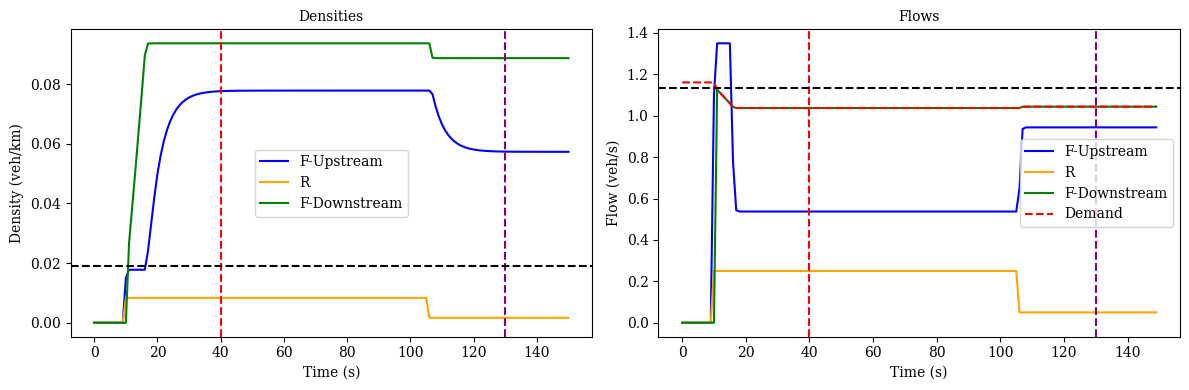

In [3]:

dem_1 = [1.4 for _ in range(12)]

for i in range(0,3):
    dem_1[i] = 1.35

dem_2 = [0.25 for _ in range(12)]
for p in range(8,12):
    dem_2[p] = 0.05
    dem_1[p] = 0.3

fd = optimizer.get_base_fd()
fd2 = optimizer.get_modified_fd()
inbound_link_1 = CTMLink(link_id=1,length=300, kj=0.1, lm=30, fundamental_diagram=fd, num_lanes = 3)
inbound_link_2 = CTMLink(link_id=2, length=300, lm=30, fundamental_diagram=fd, num_lanes = 1)
outbound_link = VariableLaneFDLink(link_id=3, length=300, lm=30, fundamental_diagram=fd, num_lanes = 2, alpha_d=0.1)

origin_node_1 = OriginNode(1, inbound_link_1, dem_1)
origin_node_2 = OriginNode(2, inbound_link_2, dem_2)
merge_node = ctm.capacityDropMerge.CapacityDropMergeNode(3, inbound_link_1, inbound_link_2, outbound_link, theta_l=0.3, theta_r=0.1)

destination_node = DestinationNode(4, outbound_link)

links = [inbound_link_1, inbound_link_2, outbound_link]
nodes = [origin_node_1, origin_node_2, merge_node, destination_node]



sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = 1.0, total_time=150)
sim.run()

f, axs = pylab.subplots(1, 2, figsize=(12, 4))

axs[0].set_title("Densities")
axs[1].set_title("Flows")

axs[0].plot(inbound_link_1.rho[inbound_link_1.num_cells-1,:], label="F-Upstream", color='blue')
axs[0].plot(inbound_link_2.rho[inbound_link_2.num_cells-1,:], label="R", color='orange')
axs[0].plot(outbound_link.rho[0,:], label="F-Downstream", color='green')

axs[1].plot(inbound_link_1.qs[inbound_link_1.num_cells-1,:], label="F-Upstream", color='blue')
axs[1].plot(inbound_link_2.qs[inbound_link_2.num_cells-1,:], label="R", color='orange')
axs[1].plot(outbound_link.qs[0,:], label="F-Downstream", color='green')
axs[1].plot(outbound_link.first_cell_demands, label="Demand", color='red', linestyle='--')

axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Density (veh/km)")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Flow (veh/s)")

axs[0].legend()
axs[1].legend()

axs[0].axvline(40, color='red', linestyle='--', label='Switch Time')
axs[1].axvline(40, color='red', linestyle='--', label='Switch Time')

axs[0].axvline(130, color='purple', linestyle='--', label='Switch Time')
axs[1].axvline(130, color='purple', linestyle='--', label='Switch Time')

axs[0].axhline(outbound_link.fundamental_diagram.get_critical_density(), color='black', linestyle='--', label='Critical Density')
axs[1].axhline(outbound_link.fundamental_diagram.get_capacity()*outbound_link.num_lanes, color='black', linestyle='--', label='Capacity')

pylab.tight_layout()
pylab.show()

In [4]:
import sys
import os

# Add the current directory to sys.path to make the optimizer module importable.
# This is necessary because the notebook kernel might not be running in this directory.
if '.' not in sys.path:
    sys.path.append('.')

import optimizer

print("Running optimization to find the best binary schedule...")
binary_schedule = optimizer.run_optimization()
print(f"Optimization finished. Best schedule: {binary_schedule}")

def get_base_fd():
    return optimizer.get_base_fd()

def get_network_with_demands():
    return optimizer.get_network_with_demands()

Running optimization to find the best binary schedule...


c:\Users\fdesouza\anaconda3\Lib\site-packages\scipy\optimize\_differentialevolution.py:487: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


differential_evolution step 1: f(x)= 7496.338641918037
Current schedule: [25.99588397 68.30857679 89.58452695 88.01941256] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
differential_evolution step 2: f(x)= 7484.371759632301
Current schedule: [29.82324124 58.85883739 27.74710773 77.48385663] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
differential_evolution step 3: f(x)= 7484.371759632301
Current schedule: [29.82324124 58.85883739 27.74710773 77.48385663] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
differential_evolution step 4: f(x)= 7484.371759632301
Current schedule: [29.82324124 58.85883739 27.74710773 77.48385663] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
differential_evolution step 5: f(x)= 7484.371759632301
Current schedule: [29.82324124 58.85883739 27.74710773 77.48385663] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
differential_evolution step 6: f(x)= 7484.371759632301
Current schedule: [2

In [5]:
class BaseController:
    def __init__(self, link, gamma, gamma_prime, control_step = 300):
        self.link = link
        self.fd = optimizer.get_base_fd()
        self.gamma = gamma
        self.gamma_prime = gamma_prime
        self.control_step = control_step
        self.fd2 = optimizer.get_modified_fd()
        self.base_kc = self.fd.get_critical_density()
        print(self.fd.get_capacity(), self.fd2.get_capacity())
        self.control_actions = []
    
    def start(self, time_step, total_time):
        self.control_actions.append(False)

    def run_step(self, t):
        current = self.control_actions[-1]
        if t==0 or t % self.control_step != 0:
            return
        
        period_from = max(0, t-self.control_step)
        period_to = t
        rho = self.link.rho[0, period_from:period_to].flatten().mean()
        
        if current:
            if rho > self.gamma_prime*self.fd.get_critical_density():
                enable = True
            else:
                enable = False
        else:
            if rho > self.gamma*self.fd.get_critical_density():
                enable = True
            else:
                enable = False
        
        if enable != current:
            self.link.set_switch(t, self.fd2 if enable else self.fd, self.link.num_lanes)
        self.control_actions.append(enable)

binary_schedule is [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
Case 0: Total travel time: 384.22310813681923 h, Queue TTs: 105.68273763246565 h
Case 0: Total travel distance: 17548.807053960958 km
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.058333333333333334, 0.0

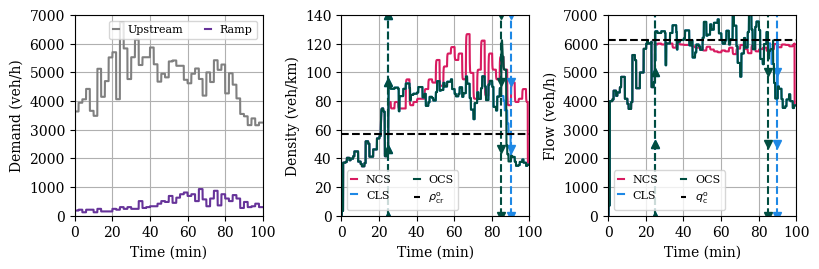

In [10]:


labels = ["NCS", "CLS", "OCS"]
line_style = ['solid', 'solid', 'solid']	
linewidths = [None, None, None]
colors = ['#D81B60', '#1E88E5', '#004D40']

fontsize=8

f, axs = pylab.subplots(1, 3, figsize=(8, 2.5))
for case in range(3):
    runner = get_network_with_demands()
    binary_schedule = [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.]
    print("binary_schedule is", binary_schedule)
    if case == 0:
        for link in runner.links:
            fd = TriangularFundamentalDiagram(vf=link.fundamental_diagram.vf, 
                                              w=link.fundamental_diagram.w, 
                                              kj=link.fundamental_diagram.kj)
            link.fundamental_diagram = fd


    controller = None
    if case == 1:
        controller = BaseController(runner.links[2], gamma=0.92, gamma_prime=0.89*3/2.0, control_step=300)
    elif case == 2:
        

        time_step = 6000/len(binary_schedule)
        schedule = {}
        for i in range(1,len(binary_schedule)):
            if binary_schedule[i] != binary_schedule[i-1]:
                schedule[int(i*time_step)] = binary_schedule[i]

        controller = optimizer.ScheduleTransitionController(runner.links[2], schedule=schedule, control_step=300)
    
    if controller is not None:    
        runner.general_purpose_objects = [controller]
    runner.run()
    
    total_travel_time = 0
    total_demand = 0
    for node in runner.nodes:
        if isinstance(node, OriginNode):
            total_travel_time += sum(node.entry_queue) * node.time_step
            total_demand += sum(node.demands_at_steps) * node.time_step
    
    queue_tts = total_travel_time
    total_travel_distance = 0
    for link in runner.links:
        total_travel_time += sum(sum(link.rho[:,:])) * link.time_step*link.num_lanes*link.lm
        total_travel_distance += sum(link.qs[0,:]) * link.time_step*link.length
    
    print(f"Case {case}: Total travel time: {total_travel_time/3600} h, Queue TTs: {queue_tts/3600} h")
    print(f"Case {case}: Total travel distance: {total_travel_distance/1000} km")
    
    if case == 0:
        print(runner.nodes[1].demands_at_steps)
        times = [i/60 for i in range(len(runner.nodes[1].demands_at_steps))]
        axs[0].plot(times, [el*3600 for el in runner.nodes[0].demands_at_steps], label="Upstream", color='gray')
        axs[0].plot(times, [el*3600 for el in runner.nodes[1].demands_at_steps], label="Ramp", color='rebeccapurple')
        axs[0].set_xlabel("Time (min)")
        axs[0].set_ylabel("Demand (veh/h)")
        axs[0].legend(fontsize=fontsize, loc=0, ncols=2, handlelength=0.5)
        axs[0].set_ylim((0, None))
        axs[0].grid(True)
        

    times = [i/60 for i in range(runner.links[2].rho.shape[1]-1)]

    axs[1].plot(times, runner.links[2].num_lanes * runner.links[2].rho[0,1:]*1000, label=labels[case], linestyle=line_style[case], color=colors[case])
    axs[2].plot(times, runner.links[2].qs[0,:]*3600, linestyle=line_style[case], label=labels[case], linewidth=linewidths[case], color=colors[case])
    

    if controller is None:
        continue

    for i in range(1,len(controller.control_actions)):
        transition_positive = controller.control_actions[i] and not controller.control_actions[i-1]
        transition_negative = not controller.control_actions[i] and controller.control_actions[i-1]
        
        if not transition_positive and not transition_negative:
            continue
        
        num_markers = 4
        max_value_density = 140
        max_value_flow = 7500
        series_density = [(max_value_density/(num_markers-1))*u for u in range(num_markers)]
        series_flow = [(max_value_flow/(num_markers-1))*u for u in range(num_markers)]
        times_d = [controller.control_step*i/60 for u in range(num_markers)]
        
        if transition_positive:
            marker = "^"
        else:
            marker = "v"
            
        axs[1].plot(times_d, series_density , color=colors[case], linestyle='dashed',  marker=marker, linewidth=linewidths[case])
        axs[2].plot(times_d, series_flow, color=colors[case], linestyle='dashed', marker=marker, linewidth=linewidths[case])


axs[1].axhline(runner.links[2].num_lanes*runner.links[2].fundamental_diagram.get_critical_density()*1000, color='black', linestyle='--', label='$\\rho^{\\mathrm{o}}_\\mathrm{cr}$')
axs[2].axhline(runner.links[2].fundamental_diagram.get_capacity()*runner.links[2].num_lanes*3600, color='black', linestyle='--', label="$q^{\\mathrm{o}}_\\mathrm{c}$")

axs[1].set_xlabel("Time (min)")
axs[2].set_ylabel("Density (veh/km/lane)")
axs[2].set_xlabel("Time (min)")
axs[2].set_ylabel("Flow (veh/h)")
axs[1].legend(fontsize=fontsize, ncols=2, handlelength=0.5)
axs[2].legend(fontsize=fontsize, ncols=2, handlelength=0.5)
axs[1].set_ylim((0, None))
axs[2].set_ylim((0, None))
axs[1].set_ylabel("Density (veh/km)")

for i in range(3):
    axs[i].grid(True)
    axs[i].set_xlim((0, 100))
    axs[i].set_xticks([0, 20, 40, 60, 80, 100])

axs[0].set_ylim((0, 7000))
axs[1].set_ylim((0, 140))
axs[1].set_yticks([20*i for i in range(8)])
axs[2].set_ylim((0, 7000))

pylab.tight_layout(w_pad=0.05, h_pad=0.02, pad=0.02)
pylab.savefig("C:\\users\\fdesouza\\Downloads\\results.pdf", dpi=500)
pylab.show()